<a href="https://colab.research.google.com/github/PARTHXT1022/Medical-Diagnosis-for-Heart-Prediction-Systems/blob/main/Medical_Diagnosis_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Medical Diagnosis for the Heart using Prediction System**
--------------------------------------------------------------------
***What are the Heart Disease and Why do they occur?***
____________________________________________________________________
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.

The term “heart disease” is often used interchangeably with the term “cardiovascular disease”. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

Heart disease is one of the biggest causes of morbidity and mortality among the population of the world. Prediction of cardiovascular disease is regarded as one of the most important subjects in the section of clinical data analysis. The amount of data in the healthcare industry is huge. Data mining turns the large collection of raw healthcare data into information that can help to make informed decisions and predictions.


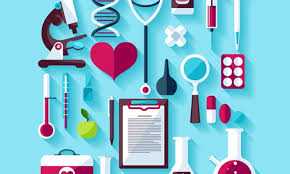

In [ ]:
import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [ ]:
df = pd.read_excel('heart.xlsx')

**Dataset information, describing its attributes and values** 

-------------------------------------------------------------------

The dataset consists of 1026 individuals data. There are 14 columns in the dataset, which are described below:-

***Age***: Displays the age of the individual.

***Sex***: Displays the gender of the individual using the following format :
  1 = male
  0 = female

***Chest-pain type***: displays the type of chest-pain experienced by the individual using the following format :
  1 = typical angina
  2 = atypical angina
  3 = non — anginal pain
  4 = asymptotic

***Resting Blood Pressure***: displays the resting blood pressure value of an individual in mmHg (unit)

***Serum Cholestrol***: displays the serum cholesterol in mg/dl (unit)
Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
  If fasting blood sugar > 120mg/dl then : 1 (true)
  else : 0 (false)

***Resting ECG*** : displays resting electrocardiographic results
  0 = normal
  1 = having ST-T wave abnormality
  2 = left ventricular hyperthrophy

***Max heart rate achieved*** : displays the max heart rate achieved by an individual.
  Exercise induced angina :
  1 = yes
  0 = no

***ST depression induced by exercise relative to rest***: displays the value which is an integer or float.
Peak exercise ST segment :
  1 = upsloping
  2 = flat
  3 = downsloping

***Number of major vessels (0–3) colored by flourosopy*** : displays the value as integer or float.

***Thal*** : displays the thalassemia :
  3 = normal
  6 = fixed defect
  7 = reversible defect

Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :
  0 = absence
  1, 2, 3, 4 = present.

In [ ]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
print(df)

       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1     53.0  1.0  0.0     140.0  203.0  1.0      0.0    155.0    1.0      3.1   
2     70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3     61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4     62.0  0.0  0.0     138.0  294.0  1.0      1.0    106.0    0.0      1.9   
...    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
1020  59.0  1.0  1.0     140.0  221.0  0.0      1.0    164.0    1.0      0.0   
1021  60.0  1.0  0.0     125.0  258.0  0.0      0.0    141.0    1.0      2.8   
1022  47.0  1.0  0.0     110.0  275.0  0.0      0.0    118.0    1.0      1.0   
1023  50.0  0.0  0.0     110.0  254.0  0.0      0.0    159.0    0.0      0.0   
1024  54.0  1.0  0.0     120.0  188.0  0.0      1.0    113.0    0.0      1.4   

      slope   ca  thal  target  
0     

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

Why these parameters:
In the actual dataset, we had 76 features but for our study, we chose only the above 14 because :

***Age***: Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.

***Sex***: Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.

***Resting Blood Pressure***: Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.

***Angina (Chest Pain)***: Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.

***Serum Cholesterol***: A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.

***Fasting Blood Sugar***: Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.

***Resting ECG***: For people at low risk of cardiovascular disease, the USPSTF concludes with moderate certainty that the potential harms of screening with resting or exercise ECG equal or exceed the potential benefits. For people at intermediate to high risk, current evidence is insufficient to assess the balance of benefits and harms of screening.

***Max heart rate achieved***: The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

***Exercise induced angina***: The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands. o Types of Angina a. Stable Angina / Angina Pectoris b. Unstable Angina c. Variant (Prinzmetal) Angina d. Microvascular Angina.

***Peak exercise ST segment***: A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Exercise ECGs with up-sloping ST-segment depressions are typically reported as an ‘equivocal’ test. In general, the occurrence of horizontal or down-sloping ST-segment depression at a lower workload (calculated in METs) or heart rate indicates a worse prognosis and higher likelihood of multi-vessel disease. The duration of ST-segment depression is also important, as prolonged recovery after peak stress is consistent with a positive treadmill ECG stress test. Another finding that is highly indicative of significant CAD is the occurrence of ST-segment elevation > 1 mm (often suggesting transmural ischemia); these patients are frequently referred urgently for coronary angiography.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

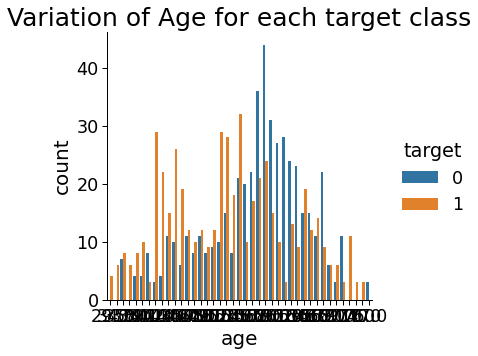

In [ ]:
# distribution of target vs age 
sns.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

Here, target = 1 implies that the person is suffering from heart disease and target = 0 implies the person is not suffering.

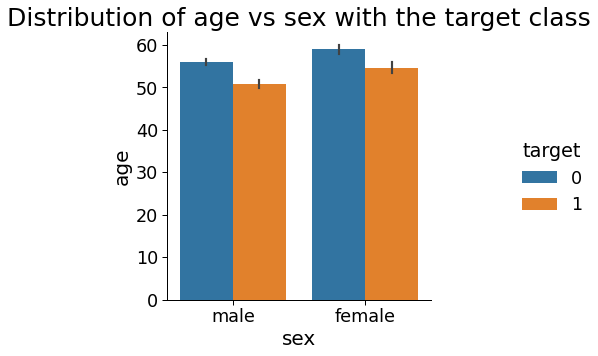

In [ ]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = df, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

df['sex'] = df.sex.map({'female': 0, 'male': 1})

Data Preprocessing

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

***Simple Vector Machines(SVM) Algorithm***

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

Well SVM it capable of doing both classification and regression. In this post I'll focus on using SVM for classification. In particular I'll be focusing on non-linear SVM, or SVM using a non-linear kernel. Non-linear SVM means that the boundary that the algorithm calculates doesn't have to be a straight line. The benefit is that you can capture much more complex relationships between your datapoints without having to perform difficult transformations on your own. The downside is that the training time is much longer as it's much more computationally intensive.

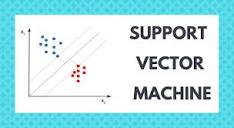

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [ ]:

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.948780487804878
Accuracy for test set for svm = 0.9658536585365853


***Naive Bayes Algorithm***

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset.
Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
Some popular examples of Naïve Bayes Algorithm are spam filtration, Sentimental analysis, and classifying articles.

***Why is it called Naive Bayes Algorithm - *** 

The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

***Naïve:*** It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

***Bayes:*** It is called Bayes because it depends on the principle of Bayes' Theorem

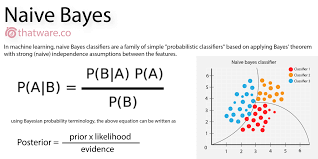

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [ ]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Naive Bayes = 0.8207317073170731
Accuracy for test set for Naive Bayes = 0.8536585365853658


***Logistic Regression for Machine Learning***

Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

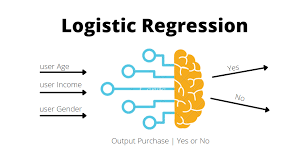



In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values                      

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [ ]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8621951219512195
Accuracy for test set for Logistic Regression = 0.8634146341463415


***Random Forest***

A random forest is a machine learning technique that's used to solve regression and classification problems. It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems. A random forest algorithm consists of many decision trees.
The ‘forest’ generated by the random forest algorithm is trained through bagging or bootstrap aggregating. Bagging is an ensemble meta-algorithm that improves the accuracy of machine learning algorithms.

Random Forest helps in two essemble the two types - 
1. Bagging– It creates a different training subset from sample training data with replacement & the final output is based on majority voting. For example,  Random Forest.

2. Boosting– It combines weak learners into strong learners by creating sequential models such that the final model has the highest accuracy. For example,  ADA BOOST, XG BOOST

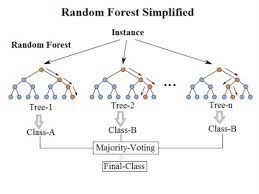


In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

In [ ]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [ ]:
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 1.0


**Thus looking at the given method we can check and then predict the cardiovascular disease using multiple regression and the classification problems**


**Thankyou !!!**